#### Project Brief

##### Recreating chart from image with Python

The original chart and dataset is obtained from the course from Python programming A - Z by Kirill Eremenko from Udemy. 

Project Code by Nicky Ng (@ahjimomo) in Jupyter Notebook with ```Python 3.7.3``` as of 11 March 2020

The code below are run on a Windows platform

---

In [6]:
## Preparation
# Packages Importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

%matplotlib inline

In [7]:
## Check current working directory
os.getcwd()

'C:\\Users\\kokwo\\OneDrive\\Desktop\\Python Course\\Homework\\Python'

In [8]:
## Importing data as dataframe
movies = pd.read_csv(# Your dataset depository #, \
                    encoding = "latin1")

# Check imported dataframe
movies #608 rows & 18 columns imported

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,action,Fury,17/10/2014,Sony,212.8,80.0,211.8,5.8,2.85,126,59.5,131.8,164.8,134,85.8,40.5
6,Thursday,Rob Marshall,adventure,Into the Woods,25/12/2014,Buena Vista Studios,213.9,50.0,212.9,6.0,3.16,84.9,39.9,162.9,325.8,125,128.0,60.1
7,Friday,Daniel Espinosa,action,Safe House,10/02/2012,Universal,215.5,85.0,208.1,6.8,3.45,81.7,39.3,123.1,144.8,115,126.4,60.7
8,Friday,Gary Shore,action,Dracula Untold,10/10/2014,Universal,216.5,70.0,215.5,6.3,2.92,159.2,73.9,145.5,207.9,92,56.3,26.1
9,Friday,"Henry Joost, Ariel Schulman",horror,Paranormal Activity 3,21/10/2011,Paramount Pictures,218.8,5.0,207,5.9,2.90,103,49.8,202,4040.0,84,104.0,50.2


In [9]:
## Cleaning columns
# Check all unique columns index
movies.columns

Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date',
       'Studio', 'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US'],
      dtype='object')

In [10]:
# Update names of all columns
movies.columns = ['Day', 'Director', 'Genre', 'Film', 'ReleaseDate', 'Studio', 'AdjustedGrossMil', 'BudgetMil', 'GrossMil',\
                 'IMDbRating', 'MovieLensRating', 'OverseasMil', 'OverseasPercent', 'ProfitMil', 'ProfitPercent', 'Runtime', \
                 'USMil', 'USPercent']

movies.columns

Index(['Day', 'Director', 'Genre', 'Film', 'ReleaseDate', 'Studio',
       'AdjustedGrossMil', 'BudgetMil', 'GrossMil', 'IMDbRating',
       'MovieLensRating', 'OverseasMil', 'OverseasPercent', 'ProfitMil',
       'ProfitPercent', 'Runtime', 'USMil', 'USPercent'],
      dtype='object')

In [11]:
## Cleaning data types
print(movies.info())
print("We can see that <AdjustedGrossMil>, <GrossMil>, <OverseasMil> & <ProfitMil> \
are objects when they are suppose to be floats.")
print("The existing objects should also be categorical variables")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
Day                 608 non-null object
Director            608 non-null object
Genre               608 non-null object
Film                608 non-null object
ReleaseDate         608 non-null object
Studio              608 non-null object
AdjustedGrossMil    608 non-null object
BudgetMil           608 non-null float64
GrossMil            608 non-null object
IMDbRating          608 non-null float64
MovieLensRating     608 non-null float64
OverseasMil         608 non-null object
OverseasPercent     608 non-null float64
ProfitMil           608 non-null object
ProfitPercent       608 non-null float64
Runtime             608 non-null int64
USMil               608 non-null float64
USPercent           608 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 85.6+ KB
None
We can see that <AdjustedGrossMil>, <GrossMil>, <OverseasMil> & <ProfitMil> are objects when they ar

In [12]:
# Changing variable types
# Issue encounted :: AdjustedGrossMil has string values that contain "," so we could not use astype() as usual

# Using a loop we should be able to remove all commas
#for i in movies.AdjustedGrossMil:
#    i.replace(',', '')

# Using Pandas built-in replace method
movies["AdjustedGrossMil"] = movies["AdjustedGrossMil"].str.replace(",","").astype(float)
movies["GrossMil"] = movies["GrossMil"].str.replace(",","").astype(float)
movies["OverseasMil"] = movies["OverseasMil"].str.replace(",","").astype(float)
movies["ProfitMil"] = movies["ProfitMil"].str.replace(",","").astype(float)

# Changing objects to category
movies.Day = movies.Day.astype("category")
movies.Director = movies.Director.astype("category")
movies.Genre = movies.Genre.astype("category")
movies.Film = movies.Film.astype("category")
movies.ReleaseDate = movies.ReleaseDate.astype("category")
movies.Studio = movies.Studio.astype("category")

# CHECK: movies.AdjustedGrossMil
    
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
Day                 608 non-null category
Director            608 non-null category
Genre               608 non-null category
Film                608 non-null category
ReleaseDate         608 non-null category
Studio              608 non-null category
AdjustedGrossMil    608 non-null float64
BudgetMil           608 non-null float64
GrossMil            608 non-null float64
IMDbRating          608 non-null float64
MovieLensRating     608 non-null float64
OverseasMil         608 non-null float64
OverseasPercent     608 non-null float64
ProfitMil           608 non-null float64
ProfitPercent       608 non-null float64
Runtime             608 non-null int64
USMil               608 non-null float64
USPercent           608 non-null float64
dtypes: category(6), float64(11), int64(1)
memory usage: 126.5 KB


In [13]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AdjustedGrossMil,608.0,545.153125,438.996563,202.10,316.9500,425.950,645.6250,6846.7
BudgetMil,608.0,92.467928,59.421407,0.60,45.0000,80.000,130.0000,300.0
GrossMil,608.0,413.466118,258.612104,200.30,246.6000,327.750,475.5000,2788.0
IMDbRating,608.0,6.923849,0.925890,3.60,6.3750,6.900,7.6000,9.2
MovieLensRating,608.0,3.340378,0.454071,1.49,3.0375,3.365,3.6725,4.5
OverseasMil,608.0,246.332237,184.581069,46.90,135.5250,189.650,283.6500,2027.5
OverseasPercent,608.0,57.698849,12.334237,17.20,49.9000,58.200,66.3000,100.0
ProfitMil,608.0,320.945559,233.887737,19.90,180.7000,247.700,389.7500,2551.0
ProfitPercent,608.0,719.278783,1942.807248,7.70,201.8500,338.550,650.1000,41333.3
Runtime,608.0,117.781250,23.179122,30.00,100.0000,116.000,130.2500,238.0


---

In [14]:
### Filtering dataframe based on categories
# Check the unique categories to create filter we need for the chart

print(movies.Studio.cat.categories)
print(movies.Genre.cat.categories)

Index(['Art House Studios', 'Buena Vista Studios', 'Colombia Pictures',
       'Dimension Films', 'Disney', 'DreamWorks', 'Fox',
       'Fox Searchlight Pictures', 'Gramercy Pictures', 'IFC', 'Lionsgate',
       'Lionsgate Films', 'Lionsgate/Summit', 'MGM', 'MiraMax',
       'New Line Cinema', 'New Market Films', 'Orion',
       'Pacific Data/DreamWorks', 'Paramount Pictures', 'Path_ Distribution',
       'Relativity Media', 'Revolution Studios', 'Screen Gems', 'Sony',
       'Sony Picture Classics', 'StudioCanal', 'Summit Entertainment',
       'TriStar', 'UA Entertainment', 'USA', 'Universal', 'Vestron Pictures',
       'WB', 'WB/New Line', 'Weinstein Company'],
      dtype='object')
Index(['action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'horror', 'musical', 'mystery',
       'romance', 'sci-fi', 'thriller'],
      dtype='object')


In [15]:
# Creating filtered data frame for Genre

FilterGenre = ["action", "comedy", "adventure", "animation", "drama"]

# Creating new Data Frame with filter
movies2 = movies[movies.Genre.isin(FilterGenre)]

# Checking new Data Frame
print(movies2.Genre.unique())

[action, comedy, adventure, animation, drama]
Categories (5, object): [action, comedy, adventure, animation, drama]


In [16]:
# Creating filtered data frame for studios

FilterStudio = ["Buena Vista Studios", "Sony", "Universal", "WB", "Paramount Pictures", "Fox"]

movies3 = movies2[movies2.Studio.isin(FilterStudio)]

# Checking new Data Frame
# ISSUE: We see that all the categories & genres are still around
print(movies3.Studio.cat.categories)
print(movies3.Genre.cat.categories)

# Removing the unused categories
movies3.Genre.cat.remove_unused_categories(inplace=True)
movies3.Studio.cat.remove_unused_categories(inplace=True)

Index(['Art House Studios', 'Buena Vista Studios', 'Colombia Pictures',
       'Dimension Films', 'Disney', 'DreamWorks', 'Fox',
       'Fox Searchlight Pictures', 'Gramercy Pictures', 'IFC', 'Lionsgate',
       'Lionsgate Films', 'Lionsgate/Summit', 'MGM', 'MiraMax',
       'New Line Cinema', 'New Market Films', 'Orion',
       'Pacific Data/DreamWorks', 'Paramount Pictures', 'Path_ Distribution',
       'Relativity Media', 'Revolution Studios', 'Screen Gems', 'Sony',
       'Sony Picture Classics', 'StudioCanal', 'Summit Entertainment',
       'TriStar', 'UA Entertainment', 'USA', 'Universal', 'Vestron Pictures',
       'WB', 'WB/New Line', 'Weinstein Company'],
      dtype='object')
Index(['action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'horror', 'musical', 'mystery',
       'romance', 'sci-fi', 'thriller'],
      dtype='object')


In [17]:
# Combining the 2 filters to create new data frame for visulisation
# movies2 = movies[(movies.Studio.isin(FilterStudio)) & (movies.Genre.isin(FilterGenre))].copy()

len(movies3) #423 rows left after filtering
print(movies3.Studio.cat.categories)
print(movies3.Genre.cat.categories)

Index(['Buena Vista Studios', 'Fox', 'Paramount Pictures', 'Sony', 'Universal',
       'WB'],
      dtype='object')
Index(['action', 'adventure', 'animation', 'comedy', 'drama'], dtype='object')


---

In [18]:
### Recreating Chart
# Part I: Setting the grid
plt.rcParams['figure.figsize'] = 14,8
sns.set(style = "darkgrid", palette = "muted", color_codes = True)


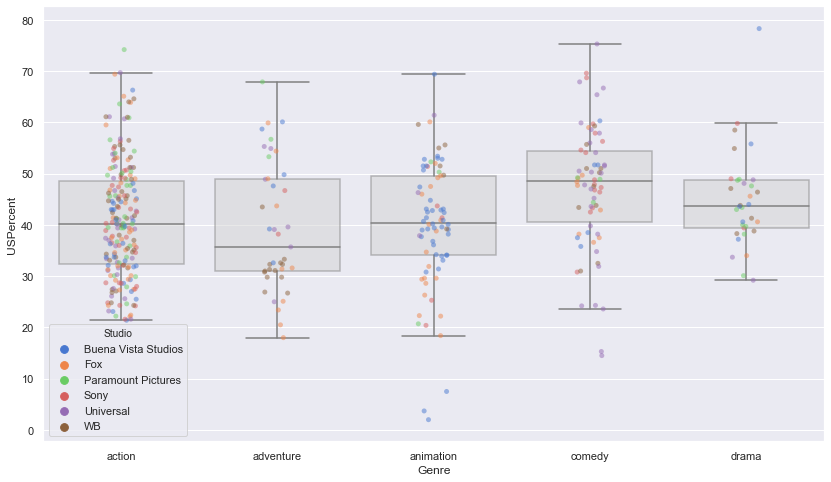

In [19]:
# Part II: Creating the plots

ax = sns.boxplot(data = movies3, x = "Genre", y = "USPercent", showfliers = False, orient = 'v', color = 'lightgray')
plt.setp(ax.artists, alpha = 0.5)

sns.stripplot(data = movies3, x = "Genre", y = "USPercent", jitter = True, size = 5, linewidth = 0, \
             hue = "Studio", alpha = 0.5)

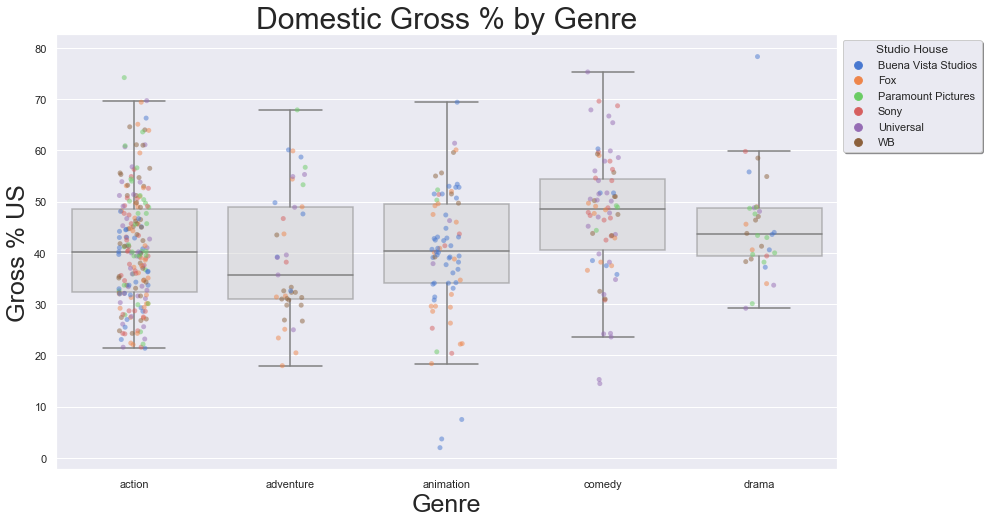

In [20]:
# Part III: Adding the finishing title, axis, legend, etc.

ax = sns.boxplot(data = movies3, x = "Genre", y = "USPercent", showfliers = False, orient = 'v', color = 'lightgray')
plt.setp(ax.artists, alpha = 0.5)

sns.stripplot(data = movies3, x = "Genre", y = "USPercent", jitter = True, size = 5, linewidth = 0, \
             hue = "Studio", alpha = 0.5)

# Adding the Title
ax.axes.set_title("Domestic Gross % by Genre", fontsize = 30)

# Setting the Labels
ax.set_xlabel("Genre", fontsize = 25)
ax.set_ylabel("Gross % US", fontsize = 25)

# Repositioning & editing the legend
ax.legend(bbox_to_anchor = (1, 1), loc = 2, frameon = True, shadow = True, title = "Studio House")

plt.show()